In [2]:
import numpy
from tensorflow import keras
from keras.constraints import maxnorm
from keras.utils import np_utils

In [3]:
seed = 21

In [4]:
from keras.datasets import cifar10

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

In [8]:
model = keras.Sequential()

Metal device set to: Apple M1


2021-12-13 19:34:42.668632: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-13 19:34:42.668741: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
model.add(keras.layers.Conv2D(32, 3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
    
model.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(class_num, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [10]:
numpy.random.seed(seed)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=64)

2021-12-13 19:34:43.538725: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/25


2021-12-13 19:34:43.797058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - ETA: 0s - loss: 1.5536 - accuracy: 0.4453

2021-12-13 19:35:07.311100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 25s 32ms/step - loss: 1.5536 - accuracy: 0.4453 - val_loss: 1.0787 - val_accuracy: 0.6192
Epoch 2/25
782/782 [==============================] - 25s 32ms/step - loss: 1.1223 - accuracy: 0.6035 - val_loss: 0.8816 - val_accuracy: 0.6894
Epoch 3/25
782/782 [==============================] - 25s 31ms/step - loss: 0.9618 - accuracy: 0.6654 - val_loss: 0.7992 - val_accuracy: 0.7191
Epoch 4/25
782/782 [==============================] - 24s 31ms/step - loss: 0.8685 - accuracy: 0.7004 - val_loss: 0.8089 - val_accuracy: 0.7208
Epoch 5/25
782/782 [==============================] - 25s 31ms/step - loss: 0.8057 - accuracy: 0.7216 - val_loss: 0.7676 - val_accuracy: 0.7345
Epoch 6/25
782/782 [==============================] - 24s 31ms/step - loss: 0.7486 - accuracy: 0.7413 - val_loss: 0.6677 - val_accuracy: 0.7644
Epoch 7/25
782/782 [==============================] - 24s 31ms/step - loss: 0.7242 - accuracy: 0.7499 - val_loss: 0.6391 - val_accuracy: 0.7753
Epo

In [11]:
model.evaluate(X_test, y_test, verbose=0)

[0.5210077166557312, 0.8280000686645508]

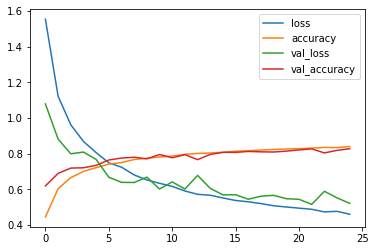

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.show()